In [ ]:
import pandas as pd
import shap
from pycaret.regression import *
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
df = pd.read_csv('df_short_1_target.csv')

In [ ]:
df = df.drop('Unnamed: 0', axis = 1)

In [ ]:
df_1 = df.copy()
df_1.columns

Index(['Prop Type', 'S/A', 'Price', 'Yr Blt', 'TypeDwel', '# of Kitchens',
       '# Rms', 'Age', 'Floor Area -Grand Total', 'Area', 'Zoning', 'Type',
       'Total Bedrooms', 'Total Baths', 'Days On Market', 'List Date',
       'Lot Sz (Sq.Ft.)', 'View', 'Fireplaces', 'List Price',
       'Sold Price per SqFt', 'Parking Places - Total', 'Gross Taxes',
       'Owner Name', 'No. Floor Levels', 'Dist to School/School Bus changed',
       'Distance to Pub/Rapid Tr changed', 'Zoning changed',
       'Realtor remarks sentiment classified',
       'Public remarks sentiment classified'],
      dtype='object')

In [ ]:
df_1 = df.drop(['Zoning', 'List Price', 'Sold Price per SqFt','Gross Taxes','Owner Name'], axis=1)

In [ ]:
df_1 = df_1[df_1['S/A'].map(df['S/A'].value_counts()) > 100]

In [ ]:
df_1.head()

,Prop Type,S/A,Price,Yr Blt,TypeDwel,# of Kitchens,# Rms,Age,Floor Area -Grand Total,Area,Type,Total Bedrooms,Total Baths,Days On Market,List Date,Lot Sz (Sq.Ft.),View,Fireplaces,Parking Places - Total,No. Floor Levels,Dist to School/School Bus changed,Distance to Pub/Rapid Tr changed,Zoning changed,Realtor remarks sentiment classified,Public remarks sentiment classified
0,Residential Attached,Brighouse,438000,2008.0,APTU,1.0,5.0,12.0,559.0,Richmond,Apartment/Condo,1.0,1.0,61,2020-10-02,0.0,No,0.0,1.0,1.0,Close,Close,CD,negative,positive
1,Residential Attached,West Central,438000,1999.0,APTU,1.0,7.0,21.0,1248.0,Maple Ridge,Apartment/Condo,2.0,2.0,58,2020-10-20,0.0,Yes,1.0,1.0,1.0,Not Close,Close,other,positive,positive
2,Residential Attached,Collingwood VE,438000,1992.0,APTU,1.0,5.0,29.0,672.0,Vancouver East,Apartment/Condo,1.0,1.0,6,2021-03-01,0.0,No,1.0,1.0,1.0,Not Close,Not Close,CD,positive,positive
3,Residential Attached,Brighouse,438000,1971.0,APTU,1.0,5.0,50.0,804.0,Richmond,Apartment/Condo,1.0,1.0,36,2021-05-28,0.0,No,0.0,1.0,1.0,Close,Close,I,positive,positive
4,Residential Attached,West End VW,438000,1984.0,APTU,1.0,5.0,36.0,552.0,Vancouver West,Apartment/Condo,1.0,1.0,38,2020-09-27,0.0,No,0.0,1.0,1.0,Not Close,Not Close,M,positive,positive


In [ ]:
df_1.shape

(54733, 25)

In [ ]:
df_1['List Date'] = pd.to_datetime(df_1['List Date'])

In [ ]:
df_1['List Date'] =  df_1['List Date'].apply(lambda x: x.toordinal())

In [ ]:
categorical_cols = [cname for cname in df_1.columns if 
                        df_1[cname].dtype == "object"]

In [ ]:
numerical_cols = [cname for cname in df_1.columns if df_1[cname].dtype in ['int64', 'float64','int32']]

In [ ]:
numerical_cols.remove('Price')

In [ ]:
experiment = setup(df_1, target='Price',high_cardinality_features=categorical_cols, numeric_features=numerical_cols, train_size = 0.8)

,Description,Value
0,session_id,5695
1,Target,Price
2,Original Data,"(54733, 25)"
3,Missing Values,True
4,Numeric Features,13
5,Categorical Features,11
6,Ordinal Features,False
7,High Cardinality Features,True
8,High Cardinality Method,frequency
9,Transformed Train Set,"(43786, 23)"


In [ ]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.460575e+05,2.144463e+11,4.599778e+05,8.488000e-01,0.1417,9.340000e-02,83.267
lightgbm,Light Gradient Boosting Machine,1.709687e+05,2.232261e+11,4.698291e+05,8.435000e-01,0.1701,1.234000e-01,0.814
rf,Random Forest Regressor,1.545276e+05,2.270560e+11,4.740929e+05,8.398000e-01,0.1519,1.014000e-01,76.464
gbr,Gradient Boosting Regressor,2.130243e+05,2.862381e+11,5.328098e+05,7.986000e-01,0.2080,1.616000e-01,16.086
ridge,Ridge Regression,3.121667e+05,4.622563e+11,6.733611e+05,6.793000e-01,0.4725,2.743000e-01,0.130
llar,Lasso Least Angle Regression,3.117464e+05,4.622781e+11,6.733729e+05,6.793000e-01,0.4744,2.737000e-01,0.191
br,Bayesian Ridge,3.122565e+05,4.622411e+11,6.733406e+05,6.793000e-01,0.4740,2.744000e-01,1.584
dt,Decision Tree Regressor,2.191102e+05,4.579643e+11,6.690152e+05,6.793000e-01,0.2096,1.397000e-01,1.209
lasso,Lasso Regression,3.121386e+05,4.622740e+11,6.733771e+05,6.792000e-01,0.4725,2.742000e-01,7.029
lr,Linear Regression,3.212054e+05,4.695755e+11,6.789540e+05,6.739000e-01,0.5053,2.880000e-01,0.421


In [ ]:
et = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,173322.3230,2.149849e+11,463664.6886,0.8520,0.1675,0.1246
1,180329.1821,2.905746e+11,539049.7565,0.8198,0.1736,0.1255
2,174260.4711,1.696940e+11,411939.3230,0.8718,0.1763,0.1293
3,159895.2719,1.186524e+11,344459.5561,0.8675,0.1663,0.1246
4,181721.2778,2.779418e+11,527201.8837,0.8007,0.1886,0.1295
5,179651.5819,2.933478e+11,541615.9339,0.7828,0.1800,0.1334
6,173683.0798,1.734166e+11,416433.1968,0.8662,0.1847,0.1294
7,183207.7842,3.528741e+11,594032.0856,0.8081,0.1718,0.1250
8,182089.9444,2.152965e+11,464000.5859,0.8501,0.1879,0.1340
9,179430.6694,2.222891e+11,471475.4921,0.8401,0.1811,0.1301


In [ ]:
save_model(et, 'et_saved_07032021')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['Prop Type', 'S/A',
                                                             'TypeDwel', 'Area',
                                                             'Type', 'View',
                                                             'Dist to '
                                                             'School/School Bus '
                                                             'changed',
                                                             'Distance to '
                                                             'Pub/Rapid Tr '
                                                             'changed',
                                                             'Zoning changed',
                                                             'Realtor remarks '
                                                             'sentiment '
                          

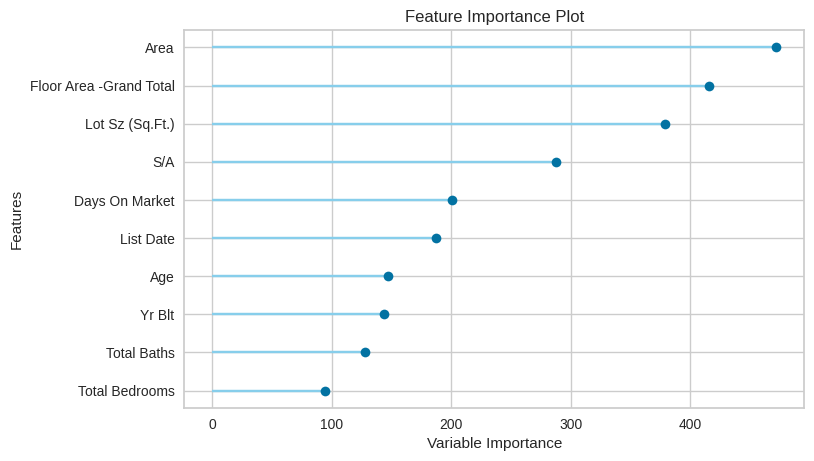

In [ ]:
plot_model(et, plot='feature')

In [ ]:
evaluate_model()